In [55]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=18, titlepad=10)
plt.rc("animation", html="html5")

data = pd.read_csv("./fuel.csv")


data.shape

(1107, 14)

In [56]:
# data.dropna(axis=0, subset=["FE"], inplace = True)

In [57]:
# data.head()


In [58]:
# no missing targets

# y = data["FE"]
# X = data.drop(["FE"], axis=1)

# low_cardinality = [col for col in X.columns if X[col].dtype =="object" and X[col].nunique() <100]


In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

X = data.copy()
y = X.pop("FE")


In [69]:
preprocessor = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
    make_column_selector(dtype_include=object))
)
X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]
input_shape

[50]

In [73]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=1)
])

In [78]:
model.compile(
    optimizer="adam",
    loss="mae"
)

In [79]:
history = model.fit(
    X, y, batch_size = 128, epochs = 200
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0802
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0545 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6165 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3200 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2331 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1764 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1456 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1154 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1027 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0759 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0736 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0677 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0623 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0656 
Epoch 16/200
9/9 ━━━

<Axes: >

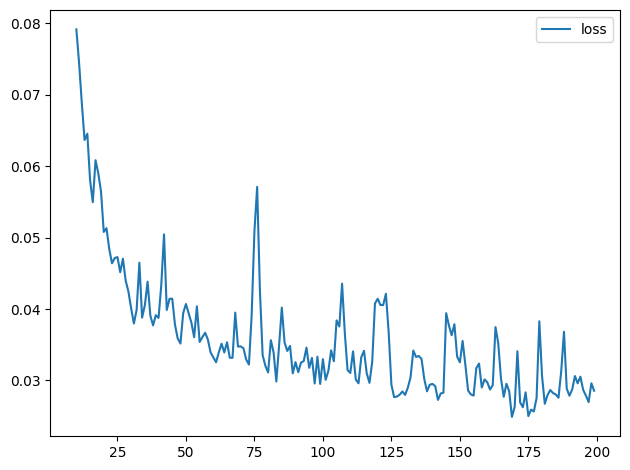

In [84]:
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ["loss"]].plot()